# Movie Recommender System Project
## IMDB Scraping using OMDB API
>Eve Ben Ezra

The following notebook contains code for scraping IMDB using the OMDBAPI - http://www.omdbapi.com/

The movies I've chosen to scrape are the movies available with data pulled from them from the MovieLens 20M dataset, available here: https://grouplens.org/datasets/movielens/20m/

The movies were scraped based on similar IMDB IDs, in two groups as the MovieLens dataset was missing the leading 'tt0' or 'tt00' of the ID. 

I chose to scrape these particular movies for plot data, as well as other aspects of the movies that are unavailable in the grouplens dataset, such as director, actors, release year, box office, and more. Hopefully this information will help me with my recommender system.

In [1]:
# https://buildmedia.readthedocs.org/media/pdf/omdbpy/latest/omdbpy.pdf

import omdb
from omdb import OMDBClient
client = OMDBClient(apikey='c5e9f974')

In [2]:
# if using the module level client
omdb.set_default('apikey', 'c5e9f974')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

%matplotlib inline

### May 28 Work (Bigger Dataset)


In [4]:
df = pd.read_csv('/Users/user/Downloads/title.basics.tsv', sep='\t')

In [5]:
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [6]:
df= df[df['titleType'] == 'movie']

In [7]:
df.shape

(519138, 9)

In [8]:
df = df.drop(['titleType','endYear'],axis=1)

In [9]:
df.head()

,tconst,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
8,tt0000009,Miss Jerry,Miss Jerry,0,1894,45,Romance
145,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,20,"Documentary,News,Sport"
332,tt0000335,Soldiers of the Cross,Soldiers of the Cross,0,1900,\N,"Biography,Drama"
499,tt0000502,Bohemios,Bohemios,0,1905,100,\N
571,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70,"Biography,Crime,Drama"


In [10]:
df['startYear'] = df['startYear'].apply(lambda x: str(x))

In [11]:
import re
df['year'] = df['startYear'].apply(lambda x: re.sub("[^0-9]", "",x))

In [12]:
df['year'] = pd.to_numeric(df['year'])

In [13]:
df = df[df['year'] <= 2019]

In [14]:
new = df[df['year'] >= 1990]

In [15]:
new.shape

(257976, 8)

In [16]:
id_list = []

for Id in new.tconst:
    id_list.append(Id)

In [17]:
len(id_list)

257976

In [18]:
new_ids = id_list

In [19]:
existing_df = pd.read_csv('/Users/user/FINAL CAPSTONE/inprogress3.csv')
old_ids = []

for Id in existing_df.imdb_id:
    old_ids.append(Id)

/Users/user/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
old_ids[:10]

['tt0114709',
 'tt0113497',
 'tt0113228',
 'tt0114885',
 'tt0113041',
 'tt0113277',
 'tt0114319',
 'tt0112302',
 'tt0114576',
 'tt0113189']

In [21]:
len(old_ids)

169918

In [22]:
grab_ids = []

for Id in new_ids:
    if Id in old_ids:
        pass
    else:
        grab_ids.append(Id)

In [23]:
len(grab_ids)

163921

In [24]:
first_pass = grab_ids[:5]

In [25]:
grab_ids[0]

'tt0081008'

In [28]:
existing_df.tail(1)

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,production,website,response,total_seasons,season,episode,series_id,budget,revenue,feature_length
169917,Ranandeh va roobah,2013,NaN,13 Oct 2013,78 min,"Documentary, Adventure, Biography",Arash Lahooti,Arash Lahooti,"Mahmoud Kiani Falavarjani, Arash Lahooti",Mahmud Kiani Falavarjani is an Iranian film am...,...,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN


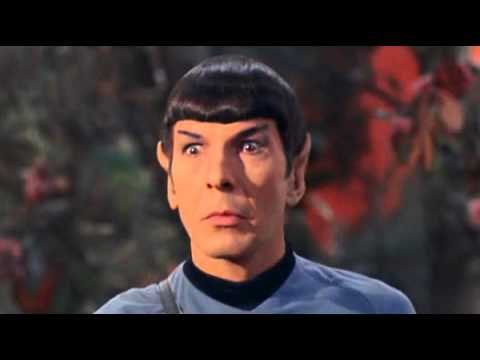

In [26]:
for Id in first_pass:
    movie = omdb.imdbid(Id, tomatoes=False, timeout=5)
    movie_set  = pd.DataFrame(movie, columns=movie.keys())
    df = pd.concat([df, movie_set], axis =0, sort=False)
    
    
#play lenord Nemoy saying "beep" for 4 hours
from IPython.display import YouTubeVideo
YouTubeVideo("BE9b3IdTCiY",autoplay=True)

In [30]:
type(movie)

dict

In [31]:
movie_set

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,metascore,imdb_rating,imdb_votes,imdb_id,type,dvd,box_office,production,website,response


In [33]:
existing_df.tail(2)

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,production,website,response,total_seasons,season,episode,series_id,budget,revenue,feature_length
169916,Peace After Marriage,2013,NOT RATED,26 Dec 2014,86 min,"Comedy, Drama, Romance","Bandar Albuliwi, Ghazi Albuliwi",Ghazi Albuliwi,"Hiam Abbass, Ghazi Albuliwi, Omer Barnea, Thom...",A sexually frustrated Palestinian-American agr...,...,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169917,Ranandeh va roobah,2013,NaN,13 Oct 2013,78 min,"Documentary, Adventure, Biography",Arash Lahooti,Arash Lahooti,"Mahmoud Kiani Falavarjani, Arash Lahooti",Mahmud Kiani Falavarjani is an Iranian film am...,...,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
a = existing_df[existing_df['title'] == "Ranandeh va roobah"]

In [44]:
a['imdb_id']

169917    tt2711708
Name: imdb_id, dtype: object

In [220]:
grab_ids[239211]

'tt2711708'

In [230]:
timeout1 = 149664 - 137789
timeout2 = 167795 - 149664
timeout3 = 186379 - 167795
timeout4 = 199184 - 186379
timeout5 = 200775 - 199184
timeout6 = 205662 - 200775
timeout7 = 207631-205662
timeout8 = 211720 - 207631
timeout9 = 215346 - 211720
timeout10 = 219394 - 215346
timeout11 = 229103 - 219394
timeout12 = 239211 - 229103
timeout13 = 242591 - 239211
print(timeout1)
print(timeout2)
print(timeout3)
print(timeout4)
print(timeout5)
print(timeout6)
print(timeout7)
print(timeout8)
print(timeout9)
print(timeout10)
print(timeout11)
print(timeout12)
print(timeout13)

11875
18131
18584
12805
1591
4887
1969
4089
3626
4048
9709
10108
3380


In [169]:
len(grab_ids[221421:])

147727

In [222]:
existing_df.to_csv('inprogress3.csv',index=False)